Addational analysis

In [ ]:
comment['body1'] = comment['body'].astype(str)
comment['body1'] = comment['body1'].apply(lambda x: " ".join([y.lemma_ for y in nlp(x) if not y.is_stop]))
comment['body1'] = comment['body1'].apply(lambda x: x.lower())
comment['body1'] = comment['body1'].apply((lambda x: re.sub('[^\w\s]','',x)))

In [ ]:
neg = comment[comment['predictions_bert']==0]
pos = comment[comment['predictions_bert']==1]

In [ ]:
max_features = 3000
maxlen = 120  # cut texts after this number of words (among top max_features most common words)
batch_size = 32
tokenizer_neg = Tokenizer(num_words=max_features, split=' ')
tokenizer_neg.fit_on_texts(neg['body1'].values)
word_counts_neg = tokenizer_neg.word_counts
df_neg = pd.DataFrame(word_counts_neg, index=[0])
df_negt = df_neg.T
df_negt.to_csv('/content/drive/MyDrive/word_neg.csv', index=True)

In [ ]:
tokenizer_pos = Tokenizer(num_words=max_features, split=' ')
tokenizer_pos.fit_on_texts(pos['body1'].values)
word_counts_pos = tokenizer_pos.word_counts
df_pos = pd.DataFrame(word_counts_pos, index=[0])
df_post = df_pos.T
df_post.to_csv('/content/drive/MyDrive/word_pos.csv', index=True)

In [ ]:
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(comment['body1'].values)
word_counts_all = tokenizer.word_counts
df_all = pd.DataFrame(word_counts_all, index=[0])
df_allt = df_all.T
df_allt.to_csv('/content/drive/MyDrive/word_all.csv', index=True)

In [ ]:
neg.head()

,created_utc,commentID,link,is_submitter,author,author_flair_richtext,link_id,parent_id,score,body,is_submitier,post_id,predictions_bert,predictions_textblob,predictions_vader,predictions_lstm,body1
2,2021-12-31,hqrtx88,https://www.reddit.com/r/work/comments/rtaumo/...,NaN,getfuckedhoayoucunts,[],t3_rtaumo,None,-3,CEO \n\nUsless fucks just sit piss arsing abou...,False,rtaumo,0,0,0,1,ceo \n\n usless fuck sit piss arse listen \n\...
4,2021-12-31,hqrrz2c,https://www.reddit.com/r/work/comments/rsp1vx/...,NaN,PristineAd9800,[],t3_rsp1vx,None,2,I’d work and see what happens. He didn’t cuz y...,False,rsp1vx,0,1,1,1,work happen cuz maybe thing got heat cuz say...
6,2021-12-31,hqrp83z,https://www.reddit.com/r/work/comments/rtaumo/...,NaN,Ok-Pear-1900,[],t3_rtaumo,None,10,"Data entry, truck driver, night time building ...",False,rtaumo,0,1,1,0,datum entry truck driver night time building...
12,2021-12-31,hqrgmtv,https://www.reddit.com/r/work/comments/rt9mdk/...,NaN,Additional_Repeat_12,[],t3_rt9mdk,None,10,I would quit and wouldn’t put the job on my re...,False,rt9mdk,0,0,1,1,quit job resume include past 3mos gap exist s...
14,2021-12-31,hqr8jb5,https://www.reddit.com/r/work/comments/rsm0vs/...,NaN,MerryP0ppins,[],t3_rsm0vs,38622913645,1,Hmmm. Are you on payroll?,False,rsm0vs,0,1,1,1,hmmm payroll


In [ ]:
temp = comment.copy()
comment1 = temp.groupby('created_utc')['author'].nunique().to_frame(name='Num_of_repliedids')
comment2 = temp.groupby('created_utc')['commentID'].nunique().to_frame(name='Num_of_comments')
comment3 = temp.groupby('created_utc').agg({'score': 'mean', 'predictions_bert': 'mean', 'predictions_lstm': 'mean', 'predictions_textblob': 'mean', 'predictions_vader': 'mean'})
comment_n = comment1.merge(comment2, how='inner', left_on='created_utc', right_on='created_utc')
comment_s = comment_n.merge(comment3, how='inner', left_on='created_utc', right_on='created_utc')

In [ ]:
comment_s

,Num_of_repliedids,Num_of_comments,predictions_bert,predictions_lstm,predictions_textblob,predictions_vader
created_utc,,,,,,
2020-12-27,16,31,0.580645,0.774194,0.741935,0.612903
2020-12-28,35,125,0.464000,0.752000,0.752000,0.712000
2020-12-29,55,121,0.553719,0.694215,0.776860,0.719008
2020-12-30,101,248,0.516129,0.701613,0.790323,0.653226
2020-12-31,61,191,0.513089,0.738220,0.753927,0.643979
...,...,...,...,...,...,...
2022-12-27,108,186,0.569892,0.596774,0.715054,0.672043
2022-12-28,120,184,0.586957,0.706522,0.728261,0.766304
2022-12-29,126,246,0.626016,0.597561,0.739837,0.739837


In [ ]:
comment_s = comment_s.drop('score', axis=1)

In [ ]:
def sma(df, rolling):
    sma = df.rolling(window=rolling, min_periods=rolling).mean()
    std =  df.rolling(window=rolling, min_periods=rolling).std()
    return sma, std
    return std

In [ ]:
rolling = 7
ma, std = sma(comment_s, rolling)

In [ ]:
print(ma)
print(std)

             Num_of_repliedids  Num_of_comments  predictions_bert  \
created_utc                                                         
2020-12-27                 NaN              NaN               NaN   
2020-12-28                 NaN              NaN               NaN   
2020-12-29                 NaN              NaN               NaN   
2020-12-30                 NaN              NaN               NaN   
2020-12-31                 NaN              NaN               NaN   
...                        ...              ...               ...   
2022-12-27          133.142857       240.142857          0.553009   
2022-12-28          132.571429       232.142857          0.561265   
2022-12-29          136.428571       239.000000          0.572774   
2022-12-30          115.571429       191.714286          0.578230   
2022-12-31          100.857143       167.000000          0.580104   

             predictions_lstm  predictions_textblob  predictions_vader  
created_utc                  

In [ ]:
comment_new = pd.concat([comment_s, ma.rename(columns={'Num_of_repliedids':'Num_of_repliedids_mean', 'Num_of_comments':'Num_of_comments_mean' , 'predictions_bert':'predictions_bert_mean', 'predictions_lsmt':'predictions_lsmt_mean', 'predictions_textblob':'predictions_textblob_mean', 'predictions_vader':'predictions_vader_mean'}), std.rename(columns={'Num_of_repliedids':'Num_of_repliedids_std', 'Num_of_comments':'Num_of_comments_std' , 'predictions_bert':'predictions_bert_std', 'predictions_lstm':'predictions_lstm_std', 'predictions_textblob':'predictions_textblob_std', 'predictions_vader':'predictions_vader_std'})], axis=1)

In [ ]:
comment_new['Num_of_repliedids_rh']=comment_new['Num_of_repliedids_mean'].shift(periods=1,axis=0)+2*comment_new['Num_of_repliedids_std'].shift(periods=1,axis=0)
#comment_new['Num_of_repliedids_rl']=comment_new['Num_of_repliedids_mean']-2*comment_new['Num_of_repliedids_std']
comment_new['Num_of_comments_rh']=comment_new['Num_of_comments_mean'].shift(periods=1,axis=0)+2*comment_new['Num_of_comments_std'].shift(periods=1,axis=0)
#comment_new['Num_of_comments_rl']=comment_new['Num_of_comments_mean']-2*comment_new['Num_of_comments_std']
comment_new['predictions_bert_rh']=comment_new['predictions_bert_mean'].shift(periods=1,axis=0)+2*comment_new['predictions_bert_std'].shift(periods=1,axis=0)
#comment_new['sentiment_rl']=comment_new['sentiment_mean']-2*comment_new['sentiment_std']
#comment_new['test'] = comment_new['predictions_bert_mean'].shift(periods=1,axis=0)

In [ ]:
comment_new.head(10)

,Num_of_repliedids,Num_of_comments,predictions_bert,predictions_lstm,predictions_textblob,predictions_vader,Num_of_repliedids_mean,Num_of_comments_mean,predictions_bert_mean,predictions_lstm,...,predictions_vader_mean,Num_of_repliedids_std,Num_of_comments_std,predictions_bert_std,predictions_lstm_std,predictions_textblob_std,predictions_vader_std,Num_of_repliedids_rh,Num_of_comments_rh,predictions_bert_rh
created_utc,,,,,,,,,,,,,,,,,,,,,
2020-12-27,16,31,0.580645,0.774194,0.741935,0.612903,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-28,35,125,0.464000,0.752000,0.752000,0.712000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-29,55,121,0.553719,0.694215,0.776860,0.719008,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-30,101,248,0.516129,0.701613,0.790323,0.653226,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-31,61,191,0.513089,0.738220,0.753927,0.643979,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01,74,186,0.553763,0.741935,0.801075,0.715054,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-02,100,196,0.581633,0.683673,0.811224,0.719388,63.142857,156.857143,0.537568,0.726550,...,0.682223,31.609221,70.704617,0.042410,0.033656,0.026758,0.044361,NaN,NaN,NaN
2021-01-03,92,169,0.615385,0.781065,0.733728,0.739645,74.000000,176.571429,0.542531,0.727532,...,0.700329,25.099801,43.935017,0.049697,0.035335,0.028583,0.036526,126.361299,298.266377,0.622388
2021-01-04,105,242,0.632231,0.698347,0.789256,0.789256,84.000000,193.285714,0.566564,0.719867,...,0.711365,20.493902,43.296321,0.045925,0.034960,0.027204,0.049874,124.199602,264.441462,0.641926


In [ ]:
comment_f = comment_new[['Num_of_repliedids','Num_of_repliedids_rh', 'Num_of_comments', 'Num_of_comments_rh', 'predictions_bert', 'predictions_bert_rh']]

In [ ]:
#comment_f = comment_new.copy()

In [ ]:
comment_f.loc[comment_f['Num_of_repliedids']> comment_f['Num_of_repliedids_rh'], 'Num_of_repliedids_a'] = 1
comment_f.loc[comment_f['Num_of_repliedids']<= comment_f['Num_of_repliedids_rh'], 'Num_of_repliedids_a'] = 0
comment_f.loc[comment_f['Num_of_comments']> comment_f['Num_of_comments_rh'], 'Num_of_comments_a'] = 1
comment_f.loc[comment_f['Num_of_comments']<= comment_f['Num_of_comments_rh'], 'Num_of_comments_a'] = 0
comment_f.loc[comment_f['predictions_bert']> comment_f['predictions_bert_rh'], 'predictions_bert_a'] = 1
comment_f.loc[comment_f['predictions_bert']<= comment_f['predictions_bert_rh'], 'predictions_bert_a'] = 0

<ipython-input-122-1b482ad491d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comment_f.loc[comment_f['Num_of_repliedids']> comment_f['Num_of_repliedids_rh'], 'Num_of_repliedids_a'] = 1
<ipython-input-122-1b482ad491d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comment_f.loc[comment_f['Num_of_comments']> comment_f['Num_of_comments_rh'], 'Num_of_comments_a'] = 1
<ipython-input-122-1b482ad491d7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [ ]:
comment_f.to_excel('/content/drive/MyDrive/comment_final.xlsx')

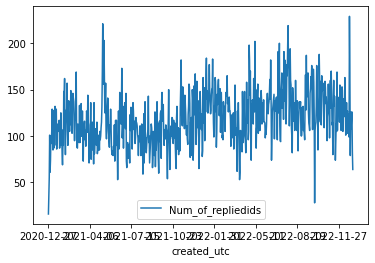

In [ ]:
lines = comment_s.plot.line(y='Num_of_repliedids')

<Axes: xlabel='created_utc'>

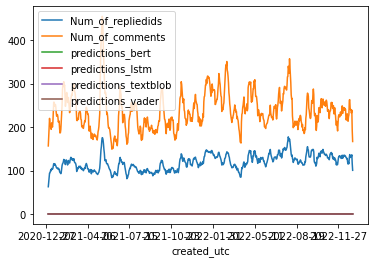

In [ ]:
ma.plot()

<Axes: xlabel='created_utc'>

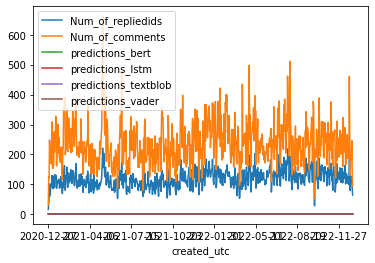

In [ ]:
comment_s.plot()

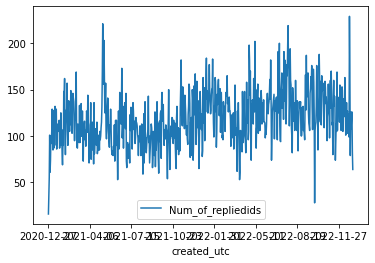

In [ ]:
comment_s.plot(y = 'Num_of_repliedids')
plt.show()

In [ ]:
comment.shape

(173867, 17)

In [ ]:
comment.head()

,created_utc,commentID,link,is_submitter,author,author_flair_richtext,link_id,parent_id,score,body,is_submitier,post_id,predictions_bert,predictions_textblob,predictions_vader,predictions_lstm,body1
0,2021-12-31,hqrvdz6,https://www.reddit.com/r/work/comments/rsrfa3/...,NaN,Additional_Repeat_12,[],t3_rsrfa3,None,2,Even when I work salary I don’t answer calls d...,False,rsrfa3,1,1,1,1,work salary answer call time work life balanc...
1,2021-12-31,hqrupnz,https://www.reddit.com/r/work/comments/rtaumo/...,NaN,X-Bones_21,[],t3_rtaumo,38623883497,3,I second this. When I sorted for UPS I rarely...,False,rtaumo,1,1,0,0,second sort ups rarely interact coworker go...
2,2021-12-31,hqrtx88,https://www.reddit.com/r/work/comments/rtaumo/...,NaN,getfuckedhoayoucunts,[],t3_rtaumo,None,-3,CEO \n\nUsless fucks just sit piss arsing abou...,False,rtaumo,0,0,0,1,ceo \n\n usless fuck sit piss arse listen \n\...
3,2021-12-31,hqrs9pw,https://www.reddit.com/r/work/comments/rtaumo/...,NaN,[deleted],NaN,t3_rtaumo,None,1,Accounting,False,rtaumo,1,1,1,1,account
4,2021-12-31,hqrrz2c,https://www.reddit.com/r/work/comments/rsp1vx/...,NaN,PristineAd9800,[],t3_rsp1vx,None,2,I’d work and see what happens. He didn’t cuz y...,False,rsp1vx,0,1,1,1,work happen cuz maybe thing got heat cuz say...


In [ ]:
event = comment[comment['created_utc']=='2021-06-07']

In [ ]:
event.shape

(215, 17)

In [ ]:
event.head()

,created_utc,commentID,link,is_submitter,author,author_flair_richtext,link_id,parent_id,score,body,is_submitier,post_id,predictions_bert,predictions_textblob,predictions_vader,predictions_lstm,body1
26258,2021-06-07,h0zxpv4,https://www.reddit.com/r/work/comments/nuwcrp/...,NaN,MavenMermaid,[],t3_nuwcrp,37065641374,1,Help a coworker out and put a delayed send on ...,False,nuwcrp,0,0,1,1,help coworker delay send message look like sen...
26259,2021-06-07,h0zxbxa,https://www.reddit.com/r/work/comments/nuwcrp/...,NaN,AnnualPanda,[],t3_nuwcrp,37065578652,1,An entire spiel saying things pertaining to wh...,True,nuwcrp,1,0,0,1,entire spiel say thing pertain abc process...
26260,2021-06-07,h0zvzj0,https://www.reddit.com/r/work/comments/nuwcrp/...,NaN,MavenMermaid,[],t3_nuwcrp,None,1,What were the contents of the message?,False,nuwcrp,0,1,1,1,content message
26261,2021-06-07,h0zuktv,https://www.reddit.com/r/work/comments/nuvmku/...,NaN,http-t,[],t3_nuvmku,37065481614,1,"I appreciate that a lot. Yes, as of now I thin...",True,nuvmku,1,1,1,1,appreciate lot yes think good summer work de...
26262,2021-06-07,h0ztwni,https://www.reddit.com/r/work/comments/nuvmku/...,NaN,PetmyCAD,[],t3_nuvmku,None,1,You work on weekends too?! I mean if your fina...,False,nuvmku,1,0,1,1,work weekend mean financial situation requir...


In [ ]:

count = event.groupby('post_id').size().sort_values(ascending=False)
print(count)

post_id
nui53c    35
nu9cqg    18
nu1l9d    11
nuiw46    10
nukjvh     8
nujxgj     8
nu7siv     8
nuhsrn     7
nucso8     6
ntwr3s     6
nu9l0z     5
nufegi     4
nuff60     4
nua1rx     4
nurg70     4
nfrpcf     4
nu9cm8     4
nuj7wc     3
nukka9     3
nupk1j     3
nurpg9     3
nuu404     3
nuwcrp     3
nu488x     3
nsc3qw     3
nu6yx0     2
nugypy     2
nuvmku     2
numy7d     2
nuk2xb     2
nu5i6a     2
nuicfg     2
ntok8k     2
ntiex7     2
ntyic0     2
n5py1j     2
nty8zm     2
ntosad     1
nun0id     1
n9x9k7     1
nuti1c     1
nustip     1
nlidza     1
nr29z3     1
nuqqcn     1
nuq0u4     1
nrl9wi     1
nu9zdr     1
nulbzv     1
nua08g     1
nt1c23     1
nt94r9     1
ntyaq2     1
nuj3xp     1
ntlkqd     1
nufaab     1
ntmzxb     1
mai5hh     1
dtype: int64


In [ ]:
#t= event[(event['post_id'] == 'nui53c') & (event['is_submitier'] == True)]['body']
t= event[(event['post_id'] == 'nu9cqg')]['body']

In [ ]:
t.to_excel('/content/drive/MyDrive/nu9cqg.xlsx')

In [ ]:
event['body'] = event['body'].apply(lambda x: " ".join([y.lemma_ for y in nlp(x) if not y.is_stop]))

<ipython-input-159-42f42115b181>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event['body'] = event['body'].apply(lambda x: " ".join([y.lemma_ for y in nlp(x) if not y.is_stop]))


In [ ]:
max_features = 3000
maxlen = 80  # cut texts after this number of words (among top max_features most common words)
batch_size = 32
tokenizer1 = Tokenizer(num_words=max_features, split=' ')
tokenizer1.fit_on_texts(event['body'].values)

In [ ]:
word_counts_0607 = tokenizer1.word_counts
df_0607 = pd.DataFrame(word_counts_0607, index=[0])
df_0607t = df_0607.T
df_0607t.to_csv('/content/drive/MyDrive/word_0607.csv', index=True)

In [ ]:

count_all = comment.groupby('post_id').size().to_frame(name='Count').reset_index()

In [ ]:
count_all = count_all.sort_values(by='Count', ascending=False)

In [ ]:
count_all.head(10)

,post_id,Count
3887,n6265c,251
15424,ubjga8,246
9745,qs9z2r,243
5422,o5f5i8,242
18698,w9l63a,232
14955,tzpj2c,219
18789,wbi82x,210
3931,n6vx0g,204
2880,mie7mc,185
18912,weg1dl,184


In [ ]:
count_all.columns

Index(['post_id', 'Count'], dtype='object')

In [ ]:
merged_df = pd.merge(comment, count_all, on='post_id')

In [ ]:
merged_df.head()

,created_utc,commentID,link,is_submitter,author,author_flair_richtext,link_id,parent_id,score,body,is_submitier,post_id,predictions_bert,predictions_textblob,predictions_vader,predictions_lstm,body1,Count,top10
0,2021-12-31,hqrvdz6,https://www.reddit.com/r/work/comments/rsrfa3/...,NaN,Additional_Repeat_12,[],t3_rsrfa3,None,2,Even when I work salary I don’t answer calls d...,False,rsrfa3,1,1,1,1,work salary answer call time work life balanc...,38,0
1,2021-12-31,hqrhxzc,https://www.reddit.com/r/work/comments/rsrfa3/...,NaN,Vidata,[],t3_rsrfa3,None,3,Are they paying you for it? If not don’t answe...,False,rsrfa3,1,1,1,0,pay answer tell reply pay feel like expect r...,38,0
2,2021-12-31,hqqvjbq,https://www.reddit.com/r/work/comments/rsrfa3/...,NaN,twewff4ever,[],t3_rsrfa3,None,2,I’m salary and I refuse to check email or resp...,False,rsrfa3,1,1,0,1,salary refuse check email respond outside work...,38,0
3,2021-12-31,hqqsm5h,https://www.reddit.com/r/work/comments/rsrfa3/...,NaN,Junior-Bake5741,[],t3_rsrfa3,None,1,Yes. This is how it is. And has been for at le...,False,rsrfa3,0,1,1,1,yes 15 year,38,0
4,2021-12-31,hqqnifr,https://www.reddit.com/r/work/comments/rsrfa3/...,NaN,Klobb119,[],t3_rsrfa3,38620151232,2,Someone should've told me this earlier cause I...,False,rsrfa3,0,1,1,1,tell early cause deal year,38,0


In [ ]:
merged_df.shape

(173867, 18)

In [ ]:
merged_df['top10'] = merged_df.apply(lambda x: 1 if x['Count'] >=184 else 0, axis=1)

In [ ]:
top10 = merged_df[merged_df['top10'] == 1]

In [ ]:
top10.shape

(2216, 19)

In [ ]:
top10.head()

,created_utc,commentID,link,is_submitter,author,author_flair_richtext,link_id,parent_id,score,body,is_submitier,post_id,predictions_bert,predictions_textblob,predictions_vader,predictions_lstm,body1,Count,top10
12109,2021-10-20,hhc95p4,https://www.reddit.com/r/work/comments/n6vx0g/...,NaN,BraSS72097,[],t3_n6vx0g,None,1,This is the fakest shit I've ever seen lol.\n\...,False,n6vx0g,1,1,0,1,fake shit see lol \n\n jobboy good website ea...,204,1
12110,2021-05-12,gxvjmxk,https://www.reddit.com/r/work/comments/n6vx0g/...,NaN,[deleted],NaN,t3_n6vx0g,None,1,[removed],False,n6vx0g,0,1,1,1,remove,204,1
12111,2021-05-12,gxvj8au,https://www.reddit.com/r/work/comments/n6vx0g/...,NaN,[deleted],NaN,t3_n6vx0g,None,1,[removed],False,n6vx0g,0,1,1,1,remove,204,1
12112,2021-05-12,gxviot2,https://www.reddit.com/r/work/comments/n6vx0g/...,NaN,[deleted],NaN,t3_n6vx0g,None,1,[removed],False,n6vx0g,0,1,1,1,remove,204,1
12113,2021-05-12,gxviclx,https://www.reddit.com/r/work/comments/n6vx0g/...,NaN,ashikurjaman2580,[],t3_n6vx0g,None,1,Nice project,False,n6vx0g,1,1,1,0,nice project,204,1


In [ ]:
top10.to_csv('/content/drive/MyDrive/top10.csv', index=True)

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/top10.csv')

In [ ]:
max_features = 3000
maxlen = 120  # cut texts after this number of words (among top max_features most common words)
batch_size = 32
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(top10['body1'].values)

In [ ]:
word_counts_top10 = tokenizer.word_counts
df_top10 = pd.DataFrame(word_counts_top10, index=[0])
df_top10t = df_top10.T
df_top10t.to_csv('/content/drive/MyDrive/word_top10.csv', index=True)